# Hacer un gráfico sobre un mapa base

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pyart
import os
import warnings
import cartopy.io.img_tiles as cimgt
warnings.filterwarnings('ignore')
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
radar = pyart.io.read('./data/CHI210723120051.RAWHAFJ')

# Utilicemos cartopy para generar el mapa
importamos las librerias necesarias

In [7]:
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'

In [8]:
titulo = f"RADAR CARIMAGUA {radar.time['units'][16:]}"

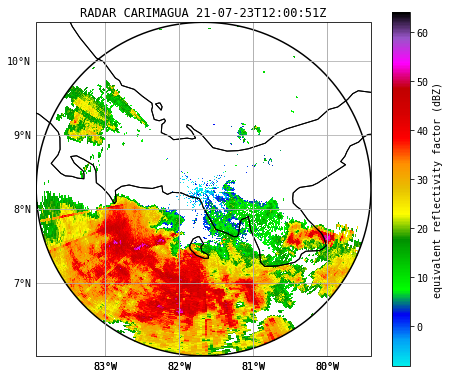

In [9]:
fig = plt.figure(figsize=(7.5, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(), zorder=1)
shp_file = './departamentos/Departamentos.shp'
shape_feature = ShapelyFeature(Reader(shp_file).geometries(), 
                               ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.add_feature(shape_feature, linewidth=0.5)
ax.coastlines(resolution='50m')
gl = ax.gridlines(draw_labels=True, rasterized=True)
gl.ylabel_style = {'rotation': 0}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=0, resolution='50m',
                     vmin=-8, vmax=64,
                     projection=ccrs.PlateCarree(), 
                     cmap='pyart_NWSRef',
                      lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0],
                    title=titulo)
display.plot_range_ring(radar.range['data'][-1] / 1000)
plt.show()

Sobre un mapa cartográfico

In [10]:
b_map = cimgt.GoogleTiles(desired_tile_form='RGB', style='street', 
                          url='https://mts0.google.com/vt/lyrs={style}@177000000&hl=en&src=api&x={x}&y={y}&z={z}&s=G')

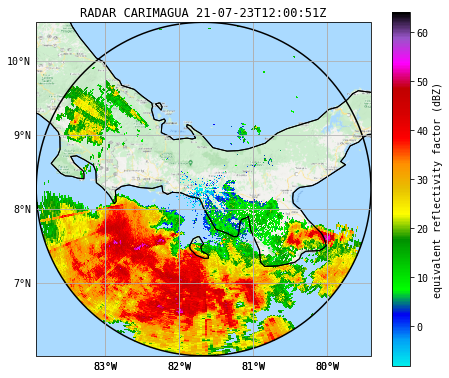

In [11]:
fig = plt.figure(figsize=(7.5, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(), zorder=1)
shp_file = './departamentos/Departamentos.shp'
shape_feature = ShapelyFeature(Reader(shp_file).geometries(), 
                               ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.add_feature(shape_feature, linewidth=0.5)
ax.coastlines(resolution='50m')
gl = ax.gridlines(draw_labels=True, rasterized=True)
gl.ylabel_style = {'rotation': 0}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=0, resolution='50m',
                     vmin=-8, vmax=64,
                     projection=ccrs.PlateCarree(), 
                     cmap='pyart_NWSRef',
                      lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0],
                    title=titulo)
display.plot_range_ring(radar.range['data'][-1] / 1000)
ax.add_image(b_map, 9)
plt.show()

#  Es Su turno
Utilice los datos del radar del tablazo para generar un mapa como el anterior

In [ ]:
radar = pyart.io.read(r'./data/TAB191023200503.RAWD9FF')
titulo = f"RADAR TABLAZO {radar.time['units'][16:]}"

In [ ]:
fig = plt.figure(figsize=(7.5, 6.5))
ax = plt.axes(projection=ccrs.PlateCarree(), zorder=1)
shp_file = './departamentos/Departamentos.shp'
shape_feature = ShapelyFeature(Reader(shp_file).geometries(), 
                               ccrs.PlateCarree(), facecolor='none', edgecolor='black')
ax.add_feature(shape_feature, linewidth=0.5)
ax.coastlines(resolution='50m')
gl = ax.gridlines(draw_labels=True, rasterized=True)
gl.ylabel_style = {'rotation': 0}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity', sweep=0, resolution='50m',
                     vmin=-8, vmax=64,
                     projection=ccrs.PlateCarree(), 
                     cmap='pyart_NWSRef',
                     lon_0=radar.longitude['data'][0], lat_0=radar.latitude['data'][0],
                    title=titulo)
display.plot_range_ring(radar.range['data'][-1] / 1000)
plt.show()